       season  round                                    event_name  \
5393     2008      3                   5. Corona Rally Mexico 2008   
5455     2008      5                          1. Jordan Rally 2008   
5499     2008      6               5. Rally d'Italia Sardegna 2008   
5629     2008      9              58. Neste Oil Rally Finland 2008   
5681     2008     10              27. ADAC Rallye Deutschland 2008   
...       ...    ...                                           ...   
13247    2022     11                  Repco Rally New Zealand 2022   
13267    2022     12  57. RallyRACC Catalunya - Costa Daurada 2022   
13327    2022     13                       FORUM8 Rally Japan 2022   
13356    2023      1        91. Rallye Automobile Monte-Carlo 2023   
13468    2023      3              19. Rally Guanajuato México 2023   

                                               event_url  \
5393                /final/151-corona-rally-mexico-2008/   
5455                       /final/153-j

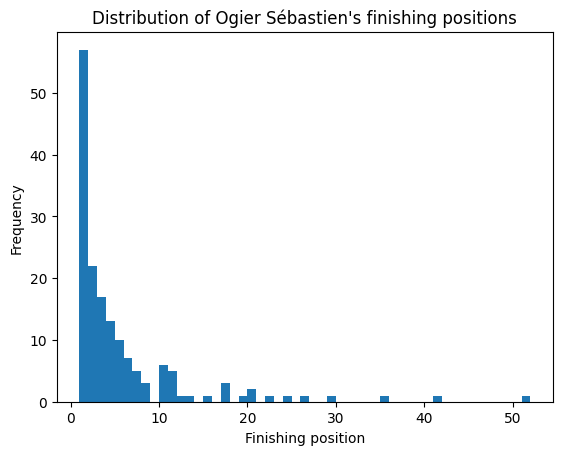

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
df = pd.read_csv("../data/results.csv")

# Choose the driver you want to plot
driver_name = 'Ogier Sébastien'

# Filter the results for the chosen driver
driver_results = df[df['driver'] == driver_name]
print(driver_results)

# Plot a histogram of finishing positions for the chosen driver
plt.hist(driver_results['final_finish'], bins=range(1, max(driver_results['final_finish'])+2))
plt.xlabel('Finishing position')
plt.ylabel('Frequency')
plt.title(f'Distribution of {driver_name}\'s finishing positions')
plt.show()

In [2]:
import pandas as pd
from scipy.stats import zscore

# Example data
results = [
    {'year': 2018, 'event': 'Rally Monte Carlo', 'location': 'Monaco', 'driver': 'Sébastien Ogier', 'position': 1, 'conditions': 'Snowy'},
    {'year': 2018, 'event': 'Rally Sweden', 'location': 'Sweden', 'driver': 'Thierry Neuville', 'position': 2, 'conditions': 'Icy'},
    {'year': 2018, 'event': 'Rally Mexico', 'location': 'Mexico', 'driver': 'Sébastien Ogier', 'position': 1, 'conditions': 'Dry'},
    {'year': 2018, 'event': 'Rally Finland', 'location': 'Finland', 'driver': 'Ott Tänak', 'position': 15, 'conditions': 'Gravel'},
    {'year': 2019, 'event': 'Rally Monte Carlo', 'location': 'Monaco', 'driver': 'Thierry Neuville', 'position': 3, 'conditions': 'Snowy'},
    {'year': 2019, 'event': 'Rally Sweden', 'location': 'Sweden', 'driver': 'Ott Tänak', 'position': 1, 'conditions': 'Icy'},
    {'year': 2019, 'event': 'Rally Mexico', 'location': 'Mexico', 'driver': 'Kris Meeke', 'position': 12, 'conditions': 'Dry'},
    {'year': 2019, 'event': 'Rally Finland', 'location': 'Finland', 'driver': 'Ott Tänak', 'position': 1, 'conditions': 'Gravel'},
]

# Create a Pandas dataframe from the results list
df = pd.read_csv("../data/results.csv")

# Group the results by event and calculate mean and standard deviation of finishing positions
grouped = df.groupby(['event_name'])['final_finish'].agg(['mean', 'std']).reset_index()

# Merge the mean and standard deviation back into the original dataframe
df = pd.merge(df, grouped, on='event_name')

# Calculate the z-score of each driver's finishing position relative to the mean and standard deviation of finishing positions for their event
df['z_score'] = (df['final_finish'] - df['mean']) / df['std']

# Print the resulting dataframe showing the z-score of each entrant to every other entrant in the event
print(df[['event_name', 'driver', 'final_finish', 'z_score']])

                                   event_name               driver  \
0      68. Rallye Automobile Monte-Carlo 2000        Mäkinen Tommi   
1      68. Rallye Automobile Monte-Carlo 2000         Sainz Carlos   
2      68. Rallye Automobile Monte-Carlo 2000       Kankkunen Juha   
3      68. Rallye Automobile Monte-Carlo 2000    Gardemeister Toni   
4      68. Rallye Automobile Monte-Carlo 2000          Thiry Bruno   
...                                       ...                  ...   
13491        19. Rally Guanajuato México 2023           Coyne John   
13492        19. Rally Guanajuato México 2023   Serderidis Jourdan   
13493        19. Rally Guanajuato México 2023      Granados Miguel   
13494        19. Rally Guanajuato México 2023  Loubet Pierre-Louis   
13495        19. Rally Guanajuato México 2023   Uriostegui Gustavo   

       final_finish   z_score  
0                 1 -1.688445  
1                 2 -1.630223  
2                 3 -1.572001  
3                 4 -1.513779  